크리스마스 관련 검색 키워드 추이 데이터

키워드 검색 트렌드 연도별 분석 중...


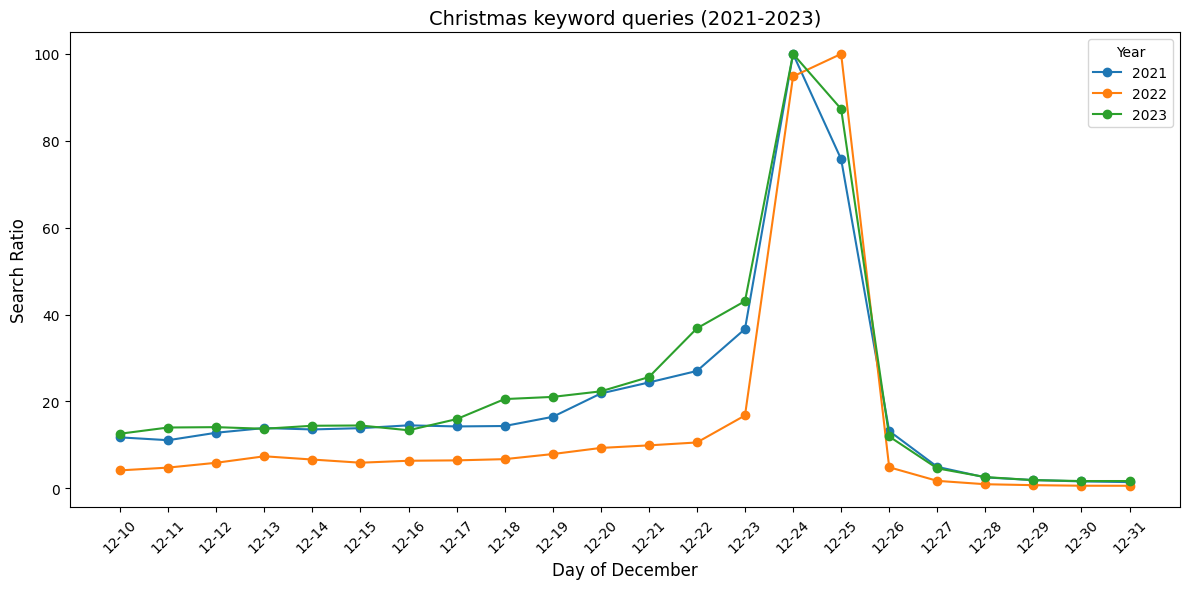

수집된 데이터:
      period     ratio    keyword  year day_of_month
0 2021-12-10  11.71767  christmas  2021        12-10
1 2021-12-11  11.06868  christmas  2021        12-11
2 2021-12-12  12.78684  christmas  2021        12-12
3 2021-12-13  13.86719  christmas  2021        12-13
4 2021-12-14  13.54415  christmas  2021        12-14


In [ ]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # 날짜 포맷과 간격 조정을 위한 모듈

# 네이버 API 정보
CLIENT_ID = "YOUR_CLIENT_ID"  # 네이버 개발자 센터에서 발급받은 Client ID
CLIENT_SECRET = "YOUR_CLIENT_SECRET"  # 네이버 개발자 센터에서 발급받은 Client Secret

# API 호출 함수
def get_trend_data(keywords, start_date, end_date, time_unit="date"):
    """
    네이버 데이터랩 API를 사용하여 여러 키워드의 검색 트렌드 데이터를 가져옵니다.
    """
    url = "https://openapi.naver.com/v1/datalab/search"
    headers = {
        "X-Naver-Client-Id": CLIENT_ID,
        "X-Naver-Client-Secret": CLIENT_SECRET
    }
    # 키워드 그룹 생성
    keyword_groups = [{"groupName": keyword, "keywords": [keyword]} for keyword in keywords]
    payload = {
        "startDate": start_date,
        "endDate": end_date,
        "timeUnit": time_unit,
        "keywordGroups": keyword_groups
    }

    response = requests.post(url, json=payload, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return None

# 데이터 수집 및 시각화
def analyze_multiple_years_trend(keywords, new_names, date_ranges):
    all_data = []
    for year, (start_date, end_date) in date_ranges.items():
        data = get_trend_data(keywords, start_date, end_date)
        if data:
            for result, new_name in zip(data['results'], new_names):
                temp_df = pd.DataFrame(result['data'])
                temp_df['period'] = pd.to_datetime(temp_df['period'])
                temp_df['ratio'] = temp_df['ratio']
                temp_df['keyword'] = new_name
                temp_df['year'] = year
                all_data.append(temp_df)
        else:
            print(f"{year} 데이터 수집에 실패했습니다.")

    # 데이터 통합
    df = pd.concat(all_data, ignore_index=True)

    # 날짜를 연도에 관계없이 동일한 범위로 정렬 (12-10부터 12-31)
    df['day_of_month'] = df['period'].dt.strftime('%m-%d')

    # 시각화
    plt.figure(figsize=(12, 6))
    for year in df['year'].unique():
        year_data = df[df['year'] == year]
        plt.plot(year_data['day_of_month'], year_data['ratio'], marker='o', label=f"{year}")

    plt.title("Christmas keyword queries (2021-2023)", fontsize=14)
    plt.xlabel("Day of December", fontsize=12)
    plt.ylabel("Search Ratio", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Year")
    plt.tight_layout()
    plt.show()

    return df

# 실행 예제
if __name__ == "__main__":
    # 원래 키워드와 간소화된 이름 매핑
    keywords = ["크리스마스"]
    new_names = ["christmas"]  # 간소화된 이름

    # 연도별 날짜 범위
    date_ranges = {
        2021: ("2021-12-10", "2021-12-31"),
        2022: ("2022-12-10", "2022-12-31"),
        2023: ("2023-12-10", "2023-12-31")
    }

    print("키워드 검색 트렌드 연도별 분석 중...")
    df = analyze_multiple_years_trend(keywords, new_names, date_ranges)

    if not df.empty:
        print("수집된 데이터:")
        print(df.head())
    else:
        print("데이터 수집에 실패했습니다.")

연령 별 검색 데이터 (카테고리 별)

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 네이버 API 정보
CLIENT_ID = "uD_1kctG8tlAmJx1XoRX"  # 네이버 개발자 센터에서 발급받은 Client ID
CLIENT_SECRET = "4PZh2CBqA1"  # 네이버 개발자 센터에서 발급받은 Client Secret


import requests
import pandas as pd
import matplotlib.pyplot as plt

# 네이버 API 정보
CLIENT_ID = "YOUR_CLIENT_ID"  # 네이버 개발자 센터에서 발급받은 Client ID
CLIENT_SECRET = "YOUR_CLIENT_SECRET"  # 네이버 개발자 센터에서 발급받은 Client Secret

# 카테고리 정보
categories = [
    {"name": "패션의류", "param": ["50000000"]},
    {"name": "패션잡화", "param": ["50000001"]},
    {"name": "화장품/미용", "param": ["50000002"]},
    {"name": "디지털/가전", "param": ["50000003"]},
    {"name": "가구/인테리어", "param": ["50000004"]},
    {"name": "출산/육아", "param": ["50000005"]},
    {"name": "스포츠/레저", "param": ["50000006"]},
    {"name": "식품", "param": ["50000007"]},
    {"name": "생활/건강", "param": ["50000008"]},
    {"name": "여가/생활편의", "param": ["50000009"]}
]

# 네이버 데이터랩 검색 트렌드 API 호출 함수
def get_trend_data(category_subset, start_date, end_date, time_unit="date"):
    """
    네이버 데이터랩 API를 사용하여 카테고리별 검색 트렌드 데이터를 가져옵니다.
    """
    url = "https://openapi.naver.com/v1/datalab/shopping/categories"
    headers = {
        "X-Naver-Client-Id": CLIENT_ID,
        "X-Naver-Client-Secret": CLIENT_SECRET
    }
    payload = {
        "startDate": start_date,
        "endDate": end_date,
        "timeUnit": time_unit,
        "category": category_subset
    }

    response = requests.post(url, json=payload, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return None

# 데이터 수집 함수
def collect_category_data(categories, start_date, end_date):
    """
    카테고리별 검색 데이터를 수집합니다 (3개씩 분할 요청).
    """
    all_data = []
    for i in range(0, len(categories), 3):  # 3개씩 분할 요청
        category_subset = categories[i:i+3]
        data = get_trend_data(category_subset, start_date, end_date)

        if not data or 'results' not in data:
            print(f"데이터 수집 실패 (카테고리 {category_subset})")
            continue

        for result in data['results']:
            category = result['title']
            for entry in result['data']:
                all_data.append({
                    "category": category,
                    "period": entry['period'],
                    "ratio": entry['ratio']
                })

    return pd.DataFrame(all_data)

# 데이터 분석 및 시각화 함수
def analyze_category_data(data):
    """
    수집된 데이터를 분석하고 시각화합니다.
    """
    # 기간 변환
    data['period'] = pd.to_datetime(data['period'])

    # 카테고리별 검색량 합계 계산
    category_totals = data.groupby('category')['ratio'].sum()

    # 시각화: 카테고리별 검색량 합계
    plt.figure(figsize=(12, 6))
    category_totals.sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title("Most Searched Categories (2023-12-10 to 2023-12-31)", fontsize=14)
    plt.xlabel("Category", fontsize=12)
    plt.ylabel("Total Search Ratio", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 시각화: 카테고리별 일자별 검색 트렌드
    plt.figure(figsize=(12, 6))
    for category in data['category'].unique():
        category_data = data[data['category'] == category]
        plt.plot(category_data['period'], category_data['ratio'], marker='o', label=category)

    plt.title("Daily Search Trends by Category", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Search Ratio", fontsize=12)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 결과 출력
    print("카테고리별 검색량 합계:")
    print(category_totals)

# 실행 예제
if __name__ == "__main__":
    start_date = "2023-12-10"
    end_date = "2023-12-31"

    print("데이터 수집 중...")
    category_data = collect_category_data(categories, start_date, end_date)

    if category_data is not None and not category_data.empty:
        print("데이터 분석 및 시각화 중...")
        analyze_category_data(category_data)
        print("수집된 데이터:")
        print(category_data.head())
    else:
        print("데이터 수집에 실패했습니다.")

데이터 수집 중...
Error: 401, {"errorMessage":"NID AUTH Result Invalid (1000) : Authentication failed. (인증에 실패했습니다.)","errorCode":"024"}
데이터 수집 실패 (카테고리 [{'name': '패션의류', 'param': ['50000000']}, {'name': '패션잡화', 'param': ['50000001']}, {'name': '화장품/미용', 'param': ['50000002']}])
Error: 401, {"errorMessage":"NID AUTH Result Invalid (1000) : Authentication failed. (인증에 실패했습니다.)","errorCode":"024"}
데이터 수집 실패 (카테고리 [{'name': '디지털/가전', 'param': ['50000003']}, {'name': '가구/인테리어', 'param': ['50000004']}, {'name': '출산/육아', 'param': ['50000005']}])
Error: 401, {"errorMessage":"NID AUTH Result Invalid (1000) : Authentication failed. (인증에 실패했습니다.)","errorCode":"024"}
데이터 수집 실패 (카테고리 [{'name': '스포츠/레저', 'param': ['50000006']}, {'name': '식품', 'param': ['50000007']}, {'name': '생활/건강', 'param': ['50000008']}])
Error: 401, {"errorMessage":"NID AUTH Result Invalid (1000) : Authentication failed. (인증에 실패했습니다.)","errorCode":"024"}
데이터 수집 실패 (카테고리 [{'name': '여가/생활편의', 'param': ['50000009']}])
데이터 수집에 실패했습니다.
